# Foundation Models for Exoplanet Characterization
Sample Notebook for ML4Sci GSoC Proposal (EXXA4)

Author: Khushi Rajurkar

This notebook is a simplified demonstration of the proposed pipeline, showcasing basic preprocessing and a mock training loop for exoplanet habitability classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Step 1: Load Sample Dataset

In [2]:
# Sample simulated dataset (replace with actual data later)
url = '/content/exoplanet_sample_large.csv'
df = pd.read_csv(url)

df.head()

,PLANET_MASS,ORBITAL_PERIOD,STELLAR_FLUX,SURFACE_TEMP,P_HABITABLE
0,3.807947,908.357620,0.267892,477.430804,0
1,9.512072,240.322329,2.661460,357.122337,1
2,7.346740,145.749977,2.707769,283.322105,1
3,6.026719,489.963308,3.190775,548.494912,1
4,1.644585,985.664804,3.633196,111.158615,0


## Step 2: Basic EDA

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PLANET_MASS     150 non-null    float64
 1   ORBITAL_PERIOD  150 non-null    float64
 2   STELLAR_FLUX    150 non-null    float64
 3   SURFACE_TEMP    150 non-null    float64
 4   P_HABITABLE     150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,PLANET_MASS,ORBITAL_PERIOD,STELLAR_FLUX,SURFACE_TEMP,P_HABITABLE
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,4.781583,518.004541,2.485801,339.030789,0.480000
std,2.935655,291.120384,1.503679,167.273864,0.501274
min,0.154669,6.056522,0.064080,56.244505,0.000000
25%,2.226335,248.230162,1.249311,194.119283,0.000000
50%,4.536301,556.445036,2.525930,342.544306,0.000000
75%,7.521652,758.079725,3.768105,496.772749,1.000000
max,9.870181,990.063796,4.952621,599.844720,1.000000


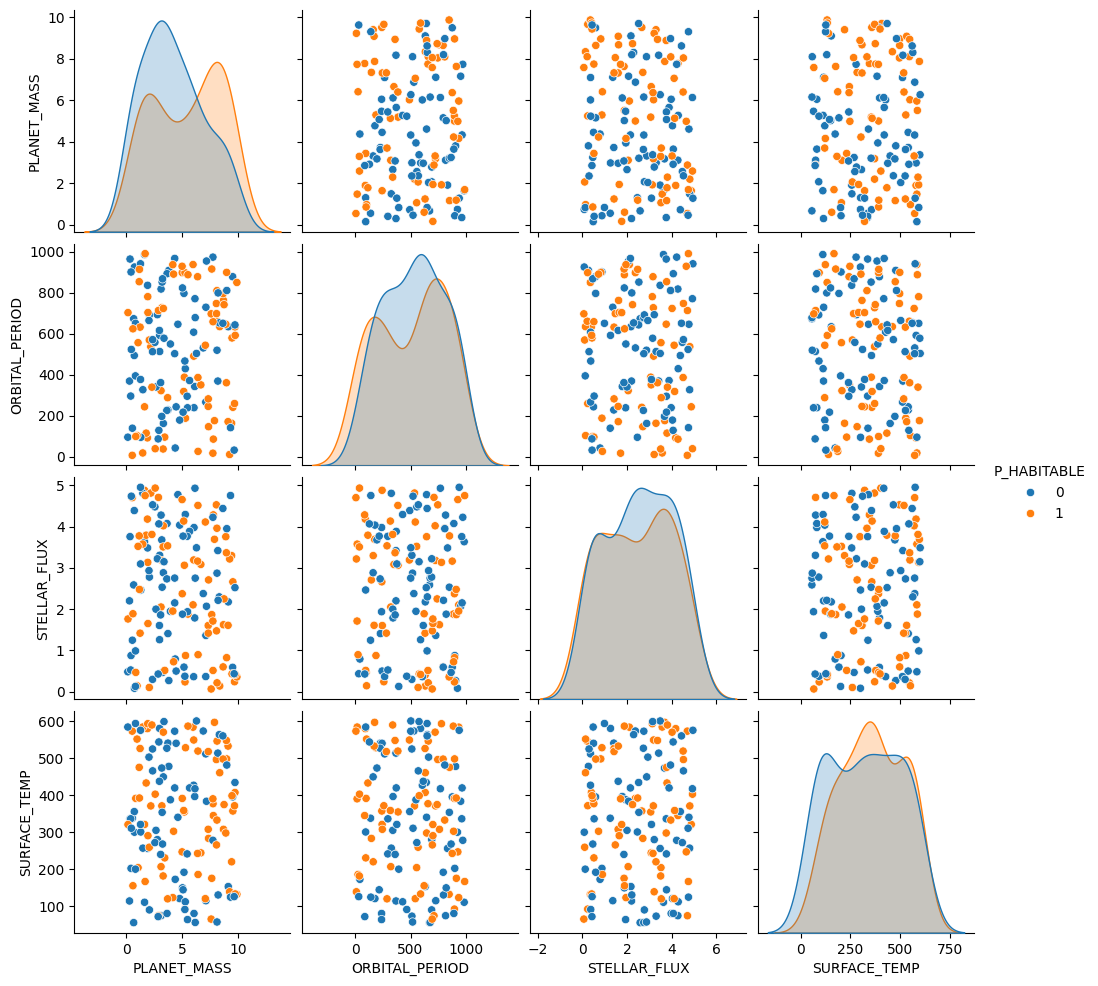

In [4]:
sns.pairplot(df, hue='P_HABITABLE')
plt.show()

## Step 3: Preprocessing

In [7]:
X = df.drop('P_HABITABLE', axis=1)
y = df['P_HABITABLE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 4: Train a Classifier

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.57      0.67      0.62        12

    accuracy                           0.67        30
   macro avg       0.66      0.67      0.66        30
weighted avg       0.68      0.67      0.67        30



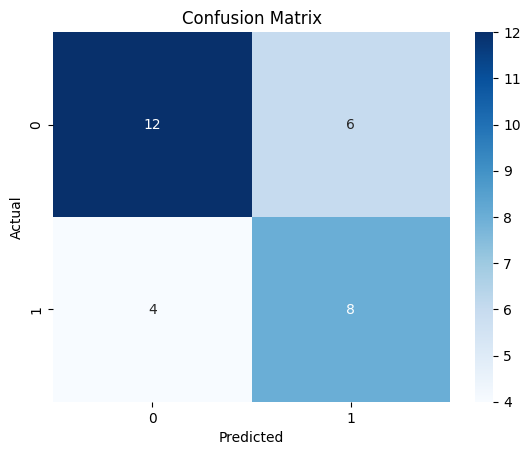

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()